<a href="https://colab.research.google.com/github/danielaureliano/python/blob/main/Avaliacao_A1_DataFrames__Daniel_Pedro_Dias_Aureliano_RGM_36376761_N1_ProgComp_SI_UDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

| ![UDF Centro Universitário](https://www.novadidattica.com.br/img/imagens/udf.png) | PROGRAMAÇÃO DE COMPUTADORES | **NOTA** | |
|     :---    |          |     ---:     |:---: |
|  **Prof(a).:**     | Kadija Valéria Reginaldo de Oliveira.
| **Turma:**  |  N1_ (Not) _SEDE_UDF _5ª feira_Lab 1.
| **Nome do aluno:** | Daniel Pedro Dias Aureliano. | **R.G.M.:** | 36376761
| **Turma:** | N1_ (Not) _SEDE_UDF _5ª feira_Lab 1 → 6_5650_Presencial_60 |**Turno:** |Noturno.
| **Assinatura do aluno:** |
| **Data da Avaliação:** |  06/05/2024

### INSTRUÇÕES
1. Leia atentamente todas as questões antes de começar a resolver.
2. **Certifique-se de que, em cada questão, todo o desenvolvimento e as operações estejam explícitos. O não cumprimento do item anulará a questão.**
3. Não será permitido o uso de celulares como calculadoras, e nem o uso do mesmo no horário de prova.
4. Essa avaliação tem o valor total de ( 5,0 ) pontos. Cada questão tem uma pontuação específica


## O Projeto

       Data da Venda                                          Produto  \
0           6/1/2017      Home Theater System 7.1 Channel X711 Silver   
1           6/1/2017        180 CFM Vertical Discharge Fan X450 Black   
2           6/1/2017        180 CFM Vertical Discharge Fan X450 Black   
3           6/1/2017        180 CFM Vertical Discharge Fan X450 Black   
4           6/1/2017        180 CFM Vertical Discharge Fan X450 Black   
...              ...                                              ...   
203877     8/31/2019  Wireless Bluetooth Stereo Headphones M402 Green   
203878     8/31/2019  Wireless Bluetooth Stereo Headphones M402 Green   
203879     8/31/2019  Wireless Bluetooth Stereo Headphones M402 Green   
203880     8/31/2019  Wireless Bluetooth Stereo Headphones M402 Green   
203881     8/31/2019    Wireless Bluetooth Stereo Headphones M402 Red   

                Subcategoria PrecoUnitario Custo Unitário              Marca  \
0        Home Theater System          1109 

Produto
Telephoto Conversion Lens X400 Silver             10633245.0
LCD24 X300 Black                                   1886976.0
LCD24 X300 White                                   1651104.0
LCD24W X300 Black                                  1235718.0
LCD19W M100 White                                   835572.0
                                                     ...    
Hand Games for kids E300 Yellow                       3388.0
Hand Games for kids E300 Red                          3355.0
Hand Games for kids E300 Black                        3102.0
Duplex Scanner M200 Green                             2682.0
Wireless Bluetooth Stereo Headphones M170 Pink        1080.0
Name: Faturamento, Length: 301, dtype: float64

Subcategoria
Home Theater System                 19565885.0
Cameras & Camcorders Accessories    10912749.0
Monitors                            10055325.0
Download Games                       2960569.0
Laptops                              1817472.0
Coffee Machines                       774040.0
Water Heaters                         625721.0
Recording Pen                         622779.0
Fans                                  553140.0
Printers, Scanners & Fax              527994.0
Car Video                             252627.0
VCD & DVD                             230361.0
Bluetooth Headphones                  163290.0
MP4&MP3                               149154.0
Movie DVD                              52998.0
Boxed Games                            13497.0
Name: Faturamento, dtype: float64

Produto
Telephoto Conversion Lens X400 Silver    17871
USB Cable M250 White                      7418
LCD19W M100 White                         4668
LCD19W M100 Black                         4311
LCD24 X300 Black                          2304
Name: Qtd. Vendida, dtype: int64

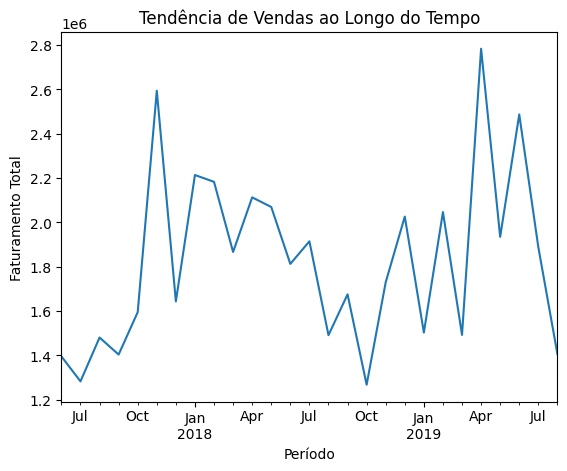

In [104]:
# Importa a biblioteca pandas, para manipulação e análise de dados
import pandas as pd

# Instalação de bibliotecas necessárias
# Essa biblioteca é necessária para se conectar ao Google Drive.
!pip install -U -q PyDrive2

# Autenticação e criação do cliente do Google Drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Essas linhas realizam a autenticação do usuário no Google Drive e criam
# um objeto de autenticação gauth. Em seguida, é criado um objeto do
# Google Drive drive usando o objeto de autenticação gauth.

# Autenticação do usuário no Google Drive
auth.authenticate_user()

# Criação de um objeto de autenticação
gauth = GoogleAuth()

# Configuração das credenciais do Google Drive
gauth.credentials = GoogleCredentials.get_application_default()

# Criação de um objeto do Google Drive
drive = GoogleDrive(gauth)

# Essas linhas realizam o download do arquivo Vendas.csv do Google Drive.
# O link do arquivo é dividido para extrair o ID do arquivo, que é usado para
# criar um objeto de arquivo downloaded. Em seguida, o conteúdo do arquivo é
# salvo em um arquivo local chamado Vendas.csv.

# Download do dataset
# O arquivo usado nesse projeto apesar de se encontrar no meu drive pessoal,
# deixei o link público para fins educativos e avaliativos desta disciplina.
link = 'https://drive.google.com/file/d/1eRv3aSrb0hyLaFK9SFpjZuoRIvuPKHYh/view'
id = link.split("/")[-2]
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('Vendas.csv')
df = pd.read_csv('Vendas.csv')
#Imprimi o DataFrame
print(df)


# Carrega os dados do arquivo CSV em um DataFrame chamado 'df'
# 'low_memory=False' é usado para minimizar o uso de memória durante a leitura
#do arquivo
df = pd.read_csv('Vendas.csv', low_memory=False)

# Converte a coluna 'Faturamento' para um tipo de dados numérico
# 'errors='coerce'' faz com que valores não numéricos sejam convertidos em
# NaN (Not a Number)
df['Faturamento'] = pd.to_numeric(df['Faturamento'], errors='coerce')

# Remove as linhas do DataFrame que contêm valores NaN na coluna Faturamento
# usando a função dropna do pandas.
df.dropna(subset=['Faturamento'], inplace=True)

# Converte a coluna 'Data da Venda' para o tipo de dados datetime
# Isso permite a manipulação de datas e a realização de operações baseadas
#em tempo
# 'errors='coerce'' faz com que valores não numéricos sejam convertidos em NaN
# (Not a Number)
df['Data da Venda'] = pd.to_datetime(df['Data da Venda'], errors='coerce')

# Remove linhas onde a coluna 'Data da Venda' contém valores NaT (Not a Time)
df.dropna(subset=['Data da Venda'], inplace=True)

# Define a coluna 'Data da Venda' como o índice do DataFrame
# Isso é necessário para realizar operações de resampling baseadas em tempo
df.set_index('Data da Venda', inplace=True)

# Essas linhas agrupam os dados por Produto e calculam a soma do Faturamento
# para cada grupo usando a função groupby e sum do pandas. Em seguida,
# os resultados são ordenados em ordem decrescente usando a função sort_values
# do pandas.
total_vendas_produto = df.groupby('Produto')['Faturamento'].sum().sort_values(ascending=False)

# Exibe o total de vendas por produto de forma interativa
display(total_vendas_produto)

# imprimi uma linha vazia de forma a pular uma linha para melhorar apresentação visual
print()

# Agrupa os dados por 'Subcategoria' e calcula a soma do 'Faturamento' para cada grupo
# Ordena os resultados em ordem decrescente para mostrar as subcategorias com maior faturamento primeiro
total_vendas_subcategoria = df.groupby('Subcategoria')['Faturamento'].sum().sort_values(ascending=False)

# Exibe o total de vendas por subcategoria de forma interativa
display(total_vendas_subcategoria)

# imprimi uma linha vazia de forma a pular uma linha para melhorar apresentação visual
print()

# Agrupa os dados por 'Produto' e calcula a soma da 'Qtd. Vendida' para cada grupo
# Ordena os resultados em ordem decrescente e pega os 5 primeiros para mostrar os produtos mais vendidos
produtos_mais_vendidos = df.groupby('Produto')['Qtd. Vendida'].sum().sort_values(ascending=False).head()

# Exibe os produtos mais vendidos de forma interativa
display(produtos_mais_vendidos)

# imprimi uma linha vazia de forma a pular uma linha para melhorar apresentação visual
print()

# Agrupa o 'Faturamento' por mês e calcula a soma para cada mês
# Isso mostra a tendência de vendas ao longo do tempo
# O método .resample('M') no pandas é usado para reamostrar uma série temporal
# para uma frequência específica. No caso de 'M', a frequência é mensal.
tendencia_vendas = df['Faturamento'].resample('M').sum()

# Cria um gráfico de linhas para visualizar a tendência de vendas ao longo do tempo
# Define os rótulos dos eixos x e y durante a criação do gráfico
grafico = tendencia_vendas.plot(title='Tendência de Vendas ao Longo do Tempo', xlabel='Período', ylabel='Faturamento Total')


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85609 entries, 2017-06-01 to 2019-08-31
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Produto         85609 non-null  object 
 1   Subcategoria    85609 non-null  object 
 2   PrecoUnitario   85609 non-null  object 
 3   Custo Unitário  85609 non-null  object 
 4   Marca           85609 non-null  object 
 5   Qtd. Vendida    85609 non-null  int64  
 6   Faturamento     85609 non-null  float64
 7   Nome Cliente    85609 non-null  object 
 8   Sobrenome       85609 non-null  object 
 9   País            85609 non-null  object 
 10  Continente      85609 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 7.8+ MB


# QUESTÃO 01 a 10

---
## AVALIAÇÃO FINAL | Considerações para a Avaliação do DataFrame

**Leia com atenção as considerações:**

Nesta prova técnica individual, você deverá demonstrar seu conhecimento em estrutura de Dados I, manipulação de dados e programação utilizando Python. Serão avaliados o uso adequado das
ferramentas, a corretude das respostas e o código fornecido, bem como a sua capacidade de solucionar problemas e aplicar conceitos relacionados a Estrutura de Dados I.

Certifique-se de apresentar as respostas de forma clara e correta para cada pergunta.
Boa sorte!


**Abaixo estão os critérios de avaliação para cada pergunta, juntamente com a pontuação atribuída a cada critério. A pontuação total da prova é de 5,0 pontos.**


**Observação: Substitua "seu_dataframe" pelo nome do DataFrame utilizado em seu projeto, junto com seu nome e turma. Após a realização das perguntas, envie o seu projeto para avaliação final.**

---

**Perguntas técnicas: cada pergunta possui uma pontuação específica.**

### **1. Apresente em tela (output) toda a base de dados. Pontuação: 0,5 pontos**

Espera-se que você exiba todo o conteúdo da base de dados na saída.

In [106]:
#  display(df) exibe o conteúdo do objeto DataFrame df em uma forma legível e formatada.
display(df)


,Produto,Subcategoria,PrecoUnitario,Custo Unitário,Marca,Qtd. Vendida,Faturamento,Nome Cliente,Sobrenome,País,Continente
Data da Venda,,,,,,,,,,,
2017-06-01,Home Theater System 7.1 Channel X711 Silver,Home Theater System,1109,"367,43",Litware,1,1109.0,Levi,Rana,França,Europa
2017-06-01,Combat Flight Simulator 3 E119,Download Games,28,"14,28",Hashtag Toys,1,28.0,Isabella,Murphy,Brasil,América do Sul
2017-06-01,Combat Flight Simulator 3 E119,Download Games,28,"14,28",Hashtag Toys,3,84.0,Caleb,Li,Estados Unidos,América do Norte
2017-06-01,Combat Flight Simulator 3 E119,Download Games,28,"14,28",Hashtag Toys,1,28.0,Dale,Luo,Canadá,América do Norte
2017-06-01,Combat Flight Simulator 3 E119,Download Games,28,"14,28",Hashtag Toys,1,28.0,Brent,Chen,Estados Unidos,América do Norte
...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,Age of Empires Expansion: The Rise of Rome 200...,Download Games,32,"16,31",Hashtag Toys,1,32.0,Sebastian,Cook,Estados Unidos,América do Norte
2019-08-31,Zoo Tycoon 2: End Range Species Expansion Pack...,Download Games,43,"21,92",Hashtag Toys,4,172.0,Thomas,Moore,Alemanha,Europa
2019-08-31,Zoo Tycoon 2: End Range Species Expansion Pack...,Download Games,43,"21,92",Hashtag Toys,1,43.0,Rebekah,Garcia,Estados Unidos,América do Norte


### **2.Apresente o tamanho do seu dataframe (quantas colunas x linhas). Pontuação: 0,5**
pontos
Você deve retornar o número de colunas e o número de linhas do dataframe.

In [107]:
#  print(df.shape) imprime o tamanho do objeto DataFrame df em forma de tupla.
# A propriedade shape do objeto DataFrame retorna um tupla com dois elementos,
# onde o primeiro elemento é o número de linhas e o segundo elemento é o número
# de colunas do DataFrame.
print(df.shape)

(85609, 11)


### **3. Acesse a linha (x) e apresente em tela todas as características do item. Pontuação: 0,5 pontos**
Você deve acessar a linha específica (x) e exibir todas as suas características ou colunas.

In [108]:
# linha_desejada: é a variável que armazena o valor inteiro inserido pelo usuário
linha_desejada = int(input("Por favor, informe o índice da linha que você deseja ver: "))
print()
# iloc[]: é um método do objeto DataFrame que permite acessar linhas e colunas
# específicas do dataframe. O i em iloc significa "integer location", ou seja,
# localização por índice inteiro.
display(df.iloc[linha_desejada])


Por favor, informe o índice da linha que você deseja ver: 5



Produto           Combat Flight Simulator 3 E119
Subcategoria                      Download Games
PrecoUnitario                                 28
Custo Unitário                             14,28
Marca                               Hashtag Toys
Qtd. Vendida                                   1
Faturamento                                 28.0
Nome Cliente                             Whitney
Sobrenome                               Gonzalez
País                              Estados Unidos
Continente                      América do Norte
Name: 2017-06-01 00:00:00, dtype: object

### **4. Verifique se o dataframe está vazio. Pontuação: 0,5 pontos**
Você deve verificar se o dataframe está vazio e fornecer o resultado dessa verificação.


In [109]:
# A propriedade empty do objeto DataFrame retorna um valor booleano,
# True se o DataFrame não tiver linhas e colunas, e False caso contrário.

# Verifica se o DataFrame df está vazio
if df.empty:
    # Se o DataFrame estiver vazio, imprime a mensagem abaixo
    print("O DataFrame está vazio.")
else:
    # Se o DataFrame não estiver vazio, imprime a mensagem abaixo
    print("O DataFrame não está vazio.")

O DataFrame não está vazio.


### **5. Apresente em tela os 5 primeiros registros da base de dados. Pontuação: 0,5 pontos**
Você deve exibir os 5 primeiros registros (linhas) da base de dados.


In [110]:
# A função head() retorna os primeiros n registros do DataFrame,
# onde n é o número de registros que você deseja exibir.
# Por padrão, n é igual a 5.
display(df.head())

,Produto,Subcategoria,PrecoUnitario,Custo Unitário,Marca,Qtd. Vendida,Faturamento,Nome Cliente,Sobrenome,País,Continente
Data da Venda,,,,,,,,,,,
2017-06-01,Home Theater System 7.1 Channel X711 Silver,Home Theater System,1109,"367,43",Litware,1,1109.0,Levi,Rana,França,Europa
2017-06-01,Combat Flight Simulator 3 E119,Download Games,28,"14,28",Hashtag Toys,1,28.0,Isabella,Murphy,Brasil,América do Sul
2017-06-01,Combat Flight Simulator 3 E119,Download Games,28,"14,28",Hashtag Toys,3,84.0,Caleb,Li,Estados Unidos,América do Norte
2017-06-01,Combat Flight Simulator 3 E119,Download Games,28,"14,28",Hashtag Toys,1,28.0,Dale,Luo,Canadá,América do Norte
2017-06-01,Combat Flight Simulator 3 E119,Download Games,28,"14,28",Hashtag Toys,1,28.0,Brent,Chen,Estados Unidos,América do Norte


### **6. Exclua um item (linha) de sua base de dados. Pontuação: 0,5 pontos**
Você deve remover um item (linha) específico da base de dados.


In [111]:
# Exclua a linha 3 (indice 2)
df.drop(df.index[2], inplace=True)
# O parâmetro inplace=True significa que a operação
# de exclusão será feita no próprio DataFrame df, sem criar um novo DataFrame.

# Apresenta a nova ordenação
display(df.head())

,Produto,Subcategoria,PrecoUnitario,Custo Unitário,Marca,Qtd. Vendida,Faturamento,Nome Cliente,Sobrenome,País,Continente
Data da Venda,,,,,,,,,,,
2017-06-02,Racing Madness 2 M370,Download Games,89,"40,93",Hashtag Toys,1,89.0,Jessica,Sanders,Brasil,América do Sul
2017-06-02,Racing Madness 2 M370,Download Games,89,"40,93",Hashtag Toys,1,89.0,Molly,Lopez,Estados Unidos,América do Norte
2017-06-02,Racing Madness 2 M370,Download Games,89,"40,93",Hashtag Toys,1,89.0,Mandy,Li,Butão,Ásia
2017-06-02,Racing Madness 2 M370,Download Games,89,"40,93",Hashtag Toys,1,89.0,Carolyn,Serrano,Alemanha,Europa
2017-06-02,Racing Madness 2 M370,Download Games,89,"40,93",Hashtag Toys,4,356.0,Glenn,Wang,Estados Unidos,América do Norte


### **7. Adicione um item (linha) na sua base de dados. Pontuação: 0,5 pontos**
Você deve adicionar um novo item (linha) à base de dados.


In [112]:
# Obtém o número de linhas do DataFrame df
indice_nova_linha = len(df)

# Adiciona uma nova linha ao final do DataFrame df
# O índice da nova linha é o número de linhas atuais + 1
df.loc[indice_nova_linha] = {
    'Data da Venda': '2017-06-02',
    'Produto': 'Aprenda Python com da Kadija Valéria Reginaldo de Oliveira',
    'Subcategoria': 'E-books',
    'PrecoUnitario': 50,
    'Custo Unitário': 30,
    'Marca': 'Editora UDF',
    'Qtd. Vendida': 15000,
    'Faturamento': 500000,
    'Nome Cliente': 'Daniel',
    'Sobrenome': 'Aureliano',
    'País': 'Brasil',
    'Continente': 'América do Sul'
}
# Exibe o DataFrame resultante
display(df)

,Produto,Subcategoria,PrecoUnitario,Custo Unitário,Marca,Qtd. Vendida,Faturamento,Nome Cliente,Sobrenome,País,Continente
Data da Venda,,,,,,,,,,,
2017-06-02 00:00:00,Racing Madness 2 M370,Download Games,89,"40,93",Hashtag Toys,1,89.0,Jessica,Sanders,Brasil,América do Sul
2017-06-02 00:00:00,Racing Madness 2 M370,Download Games,89,"40,93",Hashtag Toys,1,89.0,Molly,Lopez,Estados Unidos,América do Norte
2017-06-02 00:00:00,Racing Madness 2 M370,Download Games,89,"40,93",Hashtag Toys,1,89.0,Mandy,Li,Butão,Ásia
2017-06-02 00:00:00,Racing Madness 2 M370,Download Games,89,"40,93",Hashtag Toys,1,89.0,Carolyn,Serrano,Alemanha,Europa
2017-06-02 00:00:00,Racing Madness 2 M370,Download Games,89,"40,93",Hashtag Toys,4,356.0,Glenn,Wang,Estados Unidos,América do Norte
...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31 00:00:00,Zoo Tycoon 2: End Range Species Expansion Pack...,Download Games,43,"21,92",Hashtag Toys,4,172.0,Thomas,Moore,Alemanha,Europa
2019-08-31 00:00:00,Zoo Tycoon 2: End Range Species Expansion Pack...,Download Games,43,"21,92",Hashtag Toys,1,43.0,Rebekah,Garcia,Estados Unidos,América do Norte
2019-08-31 00:00:00,Flight Simulator X 2008 E133,Download Games,43,"21,92",Hashtag Toys,1,43.0,Kathleen,Romero,Estados Unidos,América do Norte


### **8. Transponha a coluna para a linha em sua base de dados. Pontuação: 0,5 pontos**
Você deve realizar a transposição de uma coluna para uma linha na base de dados.


In [113]:
# `df[['Produto']]` Seleciona a coluna 'Produto' do DataFrame 'df' e armazena
# o resultado em um novo DataFrame `df_transposto`. `.transpose()` Transpõe o
# novo DataFrame, trocando linhas por colunas e colunas por linhas
df_transposto = df[['Produto']].transpose()

# Exibe o novo DataFrame transposto
display(df_transposto)

Data da Venda,2017-06-02 00:00:00,2017-06-02 00:00:00,2017-06-02 00:00:00,2017-06-02 00:00:00,2017-06-02 00:00:00,2017-06-02 00:00:00,2017-06-02 00:00:00,2017-06-02 00:00:00,2017-06-02 00:00:00,2017-06-02 00:00:00,...,2019-08-31 00:00:00,2019-08-31 00:00:00,2019-08-31 00:00:00,2019-08-31 00:00:00,2019-08-31 00:00:00,2019-08-31 00:00:00,2019-08-31 00:00:00,2019-08-31 00:00:00,2019-08-31 00:00:00,85550
Produto,Racing Madness 2 M370,Racing Madness 2 M370,Racing Madness 2 M370,Racing Madness 2 M370,Racing Madness 2 M370,Age of Empires II: The Conquerors Expansion 20...,Age of Empires II: The Conquerors Expansion 20...,Age of Empires II: The Conquerors Expansion 20...,Age of Empires II: The Conquerors Expansion 20...,Age of Empires II: The Conquerors Expansion 20...,...,Home Theater System 5.1 Channel M1540 White,Age of Empires Expansion: The Rise of Rome 200...,Age of Empires Expansion: The Rise of Rome 200...,Age of Empires Expansion: The Rise of Rome 200...,Age of Empires Expansion: The Rise of Rome 200...,Zoo Tycoon 2: End Range Species Expansion Pack...,Zoo Tycoon 2: End Range Species Expansion Pack...,Flight Simulator X 2008 E133,Age of Empires Expansion: The Rise of Rome 200...,Aprenda Python com da Kadija Valéria Reginaldo...


### **9. Apresente em tela somente a 1ª e a 2ª coluna (rótulo) da base de dados. Pontuação: 0,5**
pontos
Você deve exibir apenas as colunas 1 e 2 (rótulo) da base de dados.

In [114]:
# `df[['Produto']]` Seleciona a coluna 'Produto' do DataFrame 'df' e armazena
# o resultado em um novo DataFrame. `.head(2)` Seleciona as duas primeiras
# linhas do novo DataFrame. `.transpose()`Transpõe o novo DataFrame, trocando
# linhas por colunas e colunas por linhas.
df_transposto = df[['Produto']].head(2).transpose()

# Exibe o novo DataFrame transposto
display(df_transposto)

Data da Venda,2017-06-02 00:00:00,2017-06-02 00:00:00
Produto,Racing Madness 2 M370,Racing Madness 2 M370


### **10. Informe como foi desenvolvido o Projeto. Pontuação: 0,5 pontos**
Você deve fornecer uma breve descrição de como o projeto foi desenvolvido, quais técnicas e
ferramentas foram utilizadas, e quais foram os principais desafios encontrados durante o
desenvolvimento

#### **Desenvolvimento do projeto**
Este projeto foi baseado em uma planilha de vendas de um curso de Power BI. A planilha contém 11 colunas e 85.550 linhas. Escolhi esse tema porque trabalho em uma empresa SaaS B2B que lida com licenciamento de sistemas ERP e emissão de notas fiscais.

#### **Ferramentas e Técnicas Utilizadas**
Para o desenvolvimento do projeto, utilizei as seguintes ferramentas e técnicas:

* **Pandas:** Utilizei a biblioteca pandas para manipulação e análise de dados.
* **PyDrive2:** Utilizei a biblioteca PyDrive2 para se conectar ao Google Drive e realizar o download de um arquivo CSV.
 * retirados do site https://acervolima.com/maneiras-de-importar-arquivos-csv-no-google-colab/
* **Transposição de Dados:** Utilizei o método Pandas DataFrame `transpose()` para realizar transposições de dados.
 * conhecido através do site https://www.w3schools.com/python/pandas/ref_df_transpose.asp
* **IA**: Contei com o auxílio da IA do **Copilot** para entender funções e obter orientações sobre técnicas de desenvolvimento de soluções

#### **Desafios Encontrados**
Durante o desenvolvimento do projeto, enfrentei os seguintes desafios:

##### **Exclusão de Linhas**
O primeiro desafio foi excluir a linha 3 (índice 2) do DataFrame. Para isso, utilizei o método drop() da biblioteca pandas, passando o índice da linha que desejo excluir como parâmetro. O parâmetro inplace=True significa que a operação de exclusão será feita no próprio DataFrame df, sem criar um novo DataFrame.

##### **Adição de uma Nova Linha**
O segundo desafio foi adicionar uma nova linha ao final do DataFrame df. Para isso, utilizei o método loc[] da biblioteca pandas, passando o índice da nova linha como parâmetro. O índice da nova linha é o número de linhas atuais + 1.

> **O desafio maior foi realizar essas alterações sem criar um novo DataFrame de forma a otimizar recursos e manter a eficiência do processamento.**

---

| Centro Universitário do Distrito Federal - UDF |  | www.udf.edu.br |
| :--- | :---: | :---: |
| Escola de Engenharia – Campus Reitor Rezende Ribeiro de Rezende
| SGAS 903 - Conj D - L[texto do link](https://)ote 79,
| Brasília/DF CEP: 70390-030 || Tel: (61) 3224-2220 |
